In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import pathlib
from scipy.spatial import Voronoi

In [5]:
%matplotlib qt

ori_paths = glob.glob(r"C:\Users\victo\Downloads\ML_DefectDetection\CellFiles\*.txt")
# ori_path = r"C:\Users\victo\Downloads\ML_DefectDetection\CellFiles\points000000.txt"
fig, ax = plt.subplots(1,1, figsize=(10,10))
for p in ori_paths[20:21]:
    points = np.loadtxt(p, delimiter=',')
    # plt.hist(pos_defs[:,2], bins=20, rwidth=.9, alpha=.01)
    ax.plot(points[:,0], points[:,1], ".b")

    # PosDefects defect file path
    # p_def = pathlib.Path(p).parents[1].joinpath(
    #         "DefectFiles", "PosDefects", 
    #         pathlib.Path(p).name.replace("points", "posdefects")
    #         )
    # pos_def = np.loadtxt(p_def, delimiter=',')
    # ax.plot(pos_def[:,0], pos_def[:,1], "Xr", alpha=.6)

    # NegDefects defect file path
    # p_def = pathlib.Path(p).parents[1].joinpath(
    #         "DefectFiles", "NegDefects", 
    #         pathlib.Path(p).name.replace("points", "negdefects")
    #         )
    # neg_def = np.loadtxt(p_def, delimiter=',')
    # ax.plot(neg_def[:,0], neg_def[:,1], "Dg", alpha=.6)
    # break
ax.set_aspect(1)

In [6]:
# plt.hist(points[:,0], rwidth=.9)
# plt.hist(points[:,1], rwidth=.9)
plt.hist(points[:,2], rwidth=.9)

(array([42., 50., 32., 30., 41., 30., 49., 51., 46., 29.]),
 array([-2.35571465, -2.04251002, -1.72930538, -1.41610075, -1.10289612,
        -0.78969148, -0.47648685, -0.16328222,  0.14992241,  0.46312705,
         0.77633168]),
 <BarContainer object of 10 artists>)

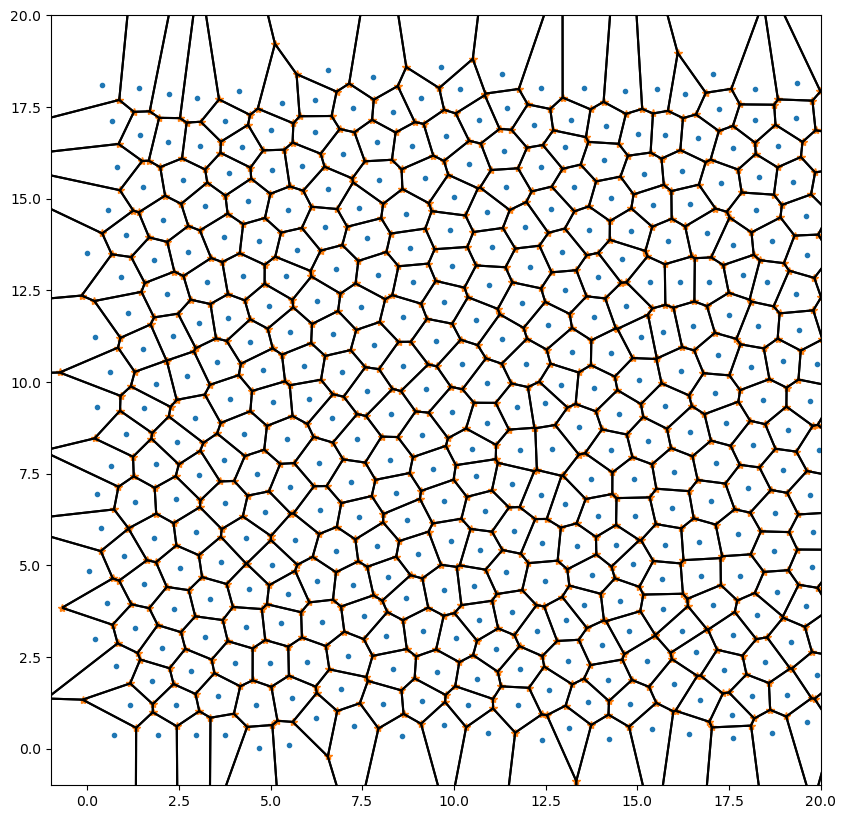

In [19]:
%matplotlib inline
import numpy as np
from scipy.spatial import Delaunay

# points = np.random.rand(30, 2)
# tri = Delaunay(points)

for p in ori_paths[20:21]:
    ptns = np.loadtxt(p, delimiter=',')

points = ptns[:,:2]
tri = Delaunay(points)

p = tri.points[tri.vertices]

# Triangle vertices
A = p[:,0,:].T
B = p[:,1,:].T
C = p[:,2,:].T

# See http://en.wikipedia.org/wiki/Circumscribed_circle#Circumscribed_circles_of_triangles
# The following is just a direct transcription of the formula there
a = A - C
b = B - C

def dot2(u, v):
    return u[0]*v[0] + u[1]*v[1]

def cross2(u, v, w):
    """u x (v x w)"""
    return dot2(u, w)*v - dot2(u, v)*w

def ncross2(u, v):
    """|| u x v ||^2"""
    return sq2(u)*sq2(v) - dot2(u, v)**2

def sq2(u):
    return dot2(u, u)

cc = cross2(sq2(a) * b - sq2(b) * a, a, b) / (2*ncross2(a, b)) + C

# Grab the Voronoi edges
vc = cc[:,tri.neighbors]
vc[:,tri.neighbors == -1] = np.nan # edges at infinity, plotting those would need more work...

lines = []
lines.extend(zip(cc.T, vc[:,:,0].T))
lines.extend(zip(cc.T, vc[:,:,1].T))
lines.extend(zip(cc.T, vc[:,:,2].T))

# Plot it
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

lines = LineCollection(lines, edgecolor='k')

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(points[:,0], points[:,1], '.')
ax.plot(cc[0], cc[1], '*')
plt.gca().add_collection(lines)
ax.set_xlim(-1, 20)
ax.set_ylim(-1, 20)
ax.set_aspect(1)